In [1]:
import numpy as np
import xarray as xr 
import matplotlib.pyplot as plt
from copy import copy
import cartopy.crs as ccrs
from cartopy.io.shapereader import Reader
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import shapely.geometry as sgeom
# 做平滑
import metpy.calc as mpcalc
# 读取wrfout文件
import salem as sl
## 读取雷达反射率的
import wrf
from netCDF4 import Dataset

plt.rcParams['font.sans-serif'] = ['SimHei']  ###防止无法显示中文并设置黑体
plt.rcParams['axes.unicode_minus'] = False  ###用来正常显示负号

In [2]:
ds=sl.open_wrf_dataset('data\wrfout_d01_2021-07-19_12_00_00')
ds

<xarray.Dataset>
Dimensions:                (south_north: 350, west_east: 360, time: 1,
                            bottom_top: 40, soil_layers: 3, seed_dim: 1)
Coordinates:
    lat                    (south_north, west_east) float32 -3.836 ... 44.15
    lon                    (south_north, west_east) float32 109.2 ... 175.2
    xtime                  (time) datetime64[ns] ...
  * time                   (time) datetime64[ns] 2021-07-19T12:00:00
  * west_east              (west_east) float64 -3.231e+06 ... 3.231e+06
  * south_north            (south_north) float64 -3.141e+06 ... 3.141e+06
Dimensions without coordinates: bottom_top, soil_layers, seed_dim
Data variables: (12/206)
    LU_INDEX               (time, south_north, west_east) float32 ...
    ZNU                    (time, bottom_top) float32 ...
    ZNW                    (time, bottom_top) float32 ...
    ZS                     (time, soil_layers) float32 ...
    DZS                    (time, soil_layers) float32 ...
    VAR_SSO                (time, south_north, west_east) float32 ...
    ...                     ...
    TK                     (time, bottom_top, south_north, west_east) float32 ...
    WS                     (time, bottom_top, south_north, west_east) float32 ...
    PRESSURE               (time, bottom_top, south_north, west_east) float32 ...
    GEOPOTENTIAL           (time, bottom_top, south_north, west_east) float32 ...
    Z                      (time, bottom_top, south_north, west_east) float32 ...
    SLP                    (time, south_north, west_east) float32 ...
Attributes: (12/133)
    TITLE:                            OUTPUT FROM WRF V4.2 MODEL
    START_DATE:                      2021-07-19_06:00:00
    SIMULATION_START_DATE:           2021-07-19_06:00:00
    WEST-EAST_GRID_DIMENSION:        361
    SOUTH-NORTH_GRID_DIMENSION:      351
    BOTTOM-TOP_GRID_DIMENSION:       41
    ...                              ...
    ISICE:                           15
    ISURBAN:                         13
    ISOILWATER:                      14
    HYBRID_OPT:                      2
    ETAC:                            0.2
    pyproj_srs:                      +proj=lcc +lat_0=23.900016784668 +lon_0=...

In [3]:
# U 
u = ds.salem.wrf_plevel('U',levels=925)
# V 
v = ds.salem.wrf_plevel('V',levels=925)


In [4]:
# 
Taa=ds['TK']
# 海平面气压
ps=ds['SLP']

In [5]:
# 累计降水sumrain 
rainsum =ds['RAINNC']
rainsum

<xarray.DataArray 'RAINNC' (time: 1, south_north: 350, west_east: 360)>
[126000 values with dtype=float32]
Coordinates:
    lat          (south_north, west_east) float32 -3.836 -3.804 ... 44.24 44.15
    lon          (south_north, west_east) float32 109.2 109.4 ... 175.0 175.2
    xtime        (time) datetime64[ns] 2021-07-19T12:00:00
  * time         (time) datetime64[ns] 2021-07-19T12:00:00
  * west_east    (west_east) float64 -3.231e+06 -3.213e+06 ... 3.231e+06
  * south_north  (south_north) float64 -3.141e+06 -3.123e+06 ... 3.141e+06
Attributes:
    FieldType:    104
    MemoryOrder:  XY 
    description:  ACCUMULATED TOTAL GRID SCALE PRECIPITATION
    units:        mm
    stagger:      
    pyproj_srs:   +proj=lcc +lat_0=23.900016784668 +lon_0=131.100006103516 +l...

In [6]:
# 组合反射率mdbz
ds=Dataset('data\wrfout_d01_2021-07-19_12_00_00')
rada=wrf.g_dbz.get_dbz(ds)
rada

<xarray.DataArray 'dbz' (bottom_top: 40, south_north: 350, west_east: 360)>
array([[[-30.       , -30.       , -30.       , ..., -30.       ,
         -30.       , -30.       ],
        [-30.       , -30.       , -30.       , ..., -30.       ,
         -30.       , -30.       ],
        [-30.       , -30.       , -30.       , ..., -30.       ,
         -30.       , -30.       ],
        ...,
        [-30.       , -30.       , -30.       , ...,  11.288789 ,
          10.168954 ,  10.170444 ],
        [-30.       , -30.       , -30.       , ..., -22.78109  ,
           9.35248  ,   9.37717  ],
        [-30.       , -30.       , -30.       , ...,   4.7794404,
           9.385099 ,   9.381819 ]],

       [[-30.       , -30.       , -30.       , ..., -30.       ,
         -30.       , -30.       ],
        [-30.       , -30.       , -30.       , ..., -30.       ,
         -30.       , -30.       ],
        [-30.       , -30.       , -30.       , ..., -30.       ,
         -30.       , -30.       ],
...
        [-30.       , -30.       , -30.       , ..., -30.       ,
         -30.       , -30.       ],
        [-30.       , -30.       , -30.       , ..., -30.       ,
         -30.       , -30.       ],
        [-30.       , -30.       , -30.       , ..., -30.       ,
         -30.       , -30.       ]],

       [[-30.       , -30.       , -30.       , ..., -30.       ,
         -30.       , -30.       ],
        [-30.       , -30.       , -30.       , ..., -30.       ,
         -30.       , -30.       ],
        [-30.       , -30.       , -30.       , ..., -30.       ,
         -30.       , -30.       ],
        ...,
        [-30.       , -30.       , -30.       , ..., -30.       ,
         -30.       , -30.       ],
        [-30.       , -30.       , -30.       , ..., -30.       ,
         -30.       , -30.       ],
        [-30.       , -30.       , -30.       , ..., -30.       ,
         -30.       , -30.       ]]], dtype=float32)
Coordinates:
    XLONG    (south_north, west_east) float32 109.2 109.4 109.5 ... 175.0 175.2
    XLAT     (south_north, west_east) float32 -3.836 -3.804 ... 44.24 44.15
    XTIME    float32 360.0
    Time     datetime64[ns] 2021-07-19T12:00:00
Dimensions without coordinates: bottom_top, south_north, west_east
Attributes:
    FieldType:      104
    MemoryOrder:    XYZ
    description:    radar reflectivity
    units:          dBZ
    stagger:        
    coordinates:    XLONG XLAT XTIME
    projection:     LambertConformal(stand_lon=131.10000610351562, moad_cen_l...
    _FillValue:     1e+20
    missing_value:  1e+20

In [7]:
radamax=wrf.g_dbz.get_max_dbz(ds)
radamax

<xarray.DataArray 'max_dbz' (south_north: 350, west_east: 360)>
array([[-30.       , -30.       , -30.       , ..., -30.       ,
        -30.       , -30.       ],
       [-30.       , -30.       , -30.       , ..., -30.       ,
        -30.       , -30.       ],
       [-30.       , -30.       , -30.       , ..., -30.       ,
        -30.       , -30.       ],
       ...,
       [-30.       , -30.       , -30.       , ...,  11.288789 ,
         10.168954 ,  10.170444 ],
       [-30.       , -30.       , -30.       , ...,   8.2428055,
          9.35248  ,   9.37717  ],
       [-30.       , -30.       , -30.       , ...,   4.7794404,
          9.385099 ,   9.381819 ]], dtype=float32)
Coordinates:
    XLONG    (south_north, west_east) float32 109.2 109.4 109.5 ... 175.0 175.2
    XLAT     (south_north, west_east) float32 -3.836 -3.804 ... 44.24 44.15
    XTIME    float32 360.0
    Time     datetime64[ns] 2021-07-19T12:00:00
Dimensions without coordinates: south_north, west_east
Attributes:
    FieldType:      104
    MemoryOrder:    XY
    description:    maximum radar reflectivity
    units:          dBZ
    stagger:        
    coordinates:    XLONG XLAT XTIME
    projection:     LambertConformal(stand_lon=131.10000610351562, moad_cen_l...
    _FillValue:     1e+20
    missing_value:  1e+20

In [8]:
# u，v风场平滑 9点
us=mpcalc.smooth_gaussian(u,9)
vs=mpcalc.smooth_gaussian(v,9)
# 累计降水平滑
rainsums=mpcalc.smooth_gaussian(rainsum,9)
# 海平面气压平滑
ps=mpcalc.smooth_gaussian(ps,9)

In [9]:
def find_side(ls, side):
    """
 Given a shapely LineString which is assumed to be rectangular, return the
 line corresponding to a given side of the rectangle.

    """
    # print(ls.bounds)
    minx, miny, maxx, maxy = ls.bounds
    points = {'left': [(minx, miny), (minx, maxy)],
              'right': [(maxx, miny), (maxx, maxy)],
              'bottom': [(minx, miny), (maxx, miny)],
              'top': [(minx, maxy), (maxx, maxy)],}
    return sgeom.LineString(points[side])

def lambert_xticks(ax, ticks,position):
    """Draw ticks on the bottom x-axis of a Lambert Conformal projection."""
    te = lambda xy: xy[0]
    lc = lambda t, n, b: np.vstack((np.zeros(n) + t, np.linspace(b[2], b[3], n))).T
    xticks, xticklabels = _lambert_ticks(ax, ticks, 'bottom', lc, te)
    if position=='bottom':
        ax.xaxis.tick_bottom()
    else:
        ax.xaxis.tick_top()
    ax.set_xticks(xticks)
    ax.set_xticklabels([ax.xaxis.get_major_formatter()(xtick) for xtick in xticklabels])

def lambert_yticks(ax, ticks,position):
    """Draw ricks on the left y-axis of a Lamber Conformal projection."""
    te = lambda xy: xy[1]
    lc = lambda t, n, b: np.vstack((np.linspace(b[0], b[1], n), np.zeros(n) + t)).T
    print(lc)
    yticks, yticklabels = _lambert_ticks(ax, ticks, 'left', lc, te)
    if position=='left':
        ax.yaxis.tick_left()
    else:
        ax.yaxis.tick_right()
    ax.set_yticks(yticks)
    ax.set_yticklabels([ax.yaxis.get_major_formatter()(ytick) for ytick in yticklabels])

def _lambert_ticks(ax, ticks, tick_location, line_constructor, tick_extractor):
    """Get the tick locations and labels for an axis of a Lambert Conformal projection."""
    # outline_patch = sgeom.LineString(ax.outline_patch.get_path().vertices.tolist())
    outline_patch = sgeom.LineString(ax.spines['geo'].get_path().vertices.tolist())
    axis = find_side(outline_patch, tick_location)
    n_steps = 30
    extent = ax.get_extent(ccrs.PlateCarree())
    _ticks = []
    for t in ticks:
        xy = line_constructor(t, n_steps, extent)
        proj_xyz = ax.projection.transform_points(ccrs.Geodetic(), xy[:, 0], xy[:, 1])
        xyt = proj_xyz[..., :2]
        ls = sgeom.LineString(xyt.tolist())
        locs = axis.intersection(ls)
        if not locs:
            tick = [None]
        else:
            tick = tick_extractor(locs.xy)
        _ticks.append(tick[0])
    # Remove ticks that aren't visible:
    ticklabels = copy(ticks)
    while True:
        try:
            index = _ticks.index(None)
        except ValueError:
            break
        _ticks.pop(index)
        ticklabels.pop(index)
    return _ticks, ticklabels

def createmap():
    box1 = [109,150.2,0,40.65]
    fig=plt.figure(figsize=(16,16))
    ax=fig.subplots(1,1,subplot_kw={'projection':ccrs.LambertConformal(central_longitude=131.1)})
    ax.coastlines('50m')
    ax.add_geometries(Reader('D:\\maplist\\China_province\\bou2_4l.shp').geometries(), ccrs.PlateCarree(),
                   facecolor='none', edgecolor='gray', linewidth=0.8)
    ax.set_extent(box1, crs=ccrs.PlateCarree())
    ##############
    fig.canvas.draw()  # 必要的
    ##############
    # 坐标刻度的绘制
    xticks =list(np.arange(70,240,5))
    yticks = [-5,0,5,10,15,20,25,30,35,40,45,50]
    ax.gridlines(xlocs=xticks, ylocs=yticks, linestyle=':', linewidth=0.3, x_inline=False, y_inline=False, color='k')
    ax.xaxis.set_major_formatter(LONGITUDE_FORMATTER)
    ax.yaxis.set_major_formatter(LATITUDE_FORMATTER)
    lambert_xticks(ax, xticks,'bottom')
    lambert_yticks(ax, yticks,'left')
    return ax,fig

In [10]:
lon=v.lon.data
lat=v.lat.data

<function lambert_yticks.<locals>.<lambda> at 0x00000253D0917B50>


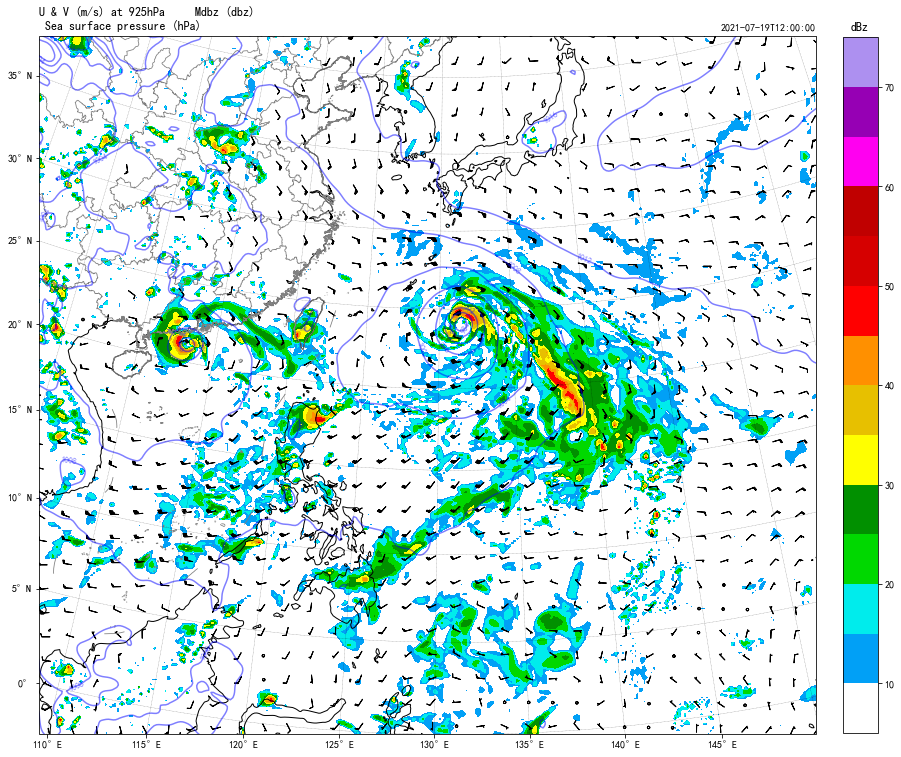

In [11]:
#  绘图 台风的风场（U，V），组合反射率（mdbz），累计降水
ax,fig=createmap()

# 标题 
ax.set_title('U & V (m/s) at 925hPa     Mdbz (dbz)  \n Sea surface pressure (hPa)',loc='left')
ax.set_title(str(v['time'].data[0])[0:19],fontdict={'fontsize':10},loc='right')

# 绘图部分
## 海平面气压
line=ax.contour(lon,lat,ps[0,:,:],colors='blue',levels=np.arange(960,1100,4),transform=ccrs.PlateCarree(),alpha=0.5)
plt.clabel(line,inline=False, fontsize=8, fmt='%.0f')

## 组合反射率（mdbz）
levels=[-100,10,15,20,25,30,35,40,45,50,55,60,65,70,100] #14
colors=['#ffffff','#01a0f6','#00ecec','#00d800','#019000','#ffff00','#e7c000','#ff9000','#ff0000','#d60000','#c00000','#ff00f0','#9600b4','#ad90f0']
colorbar=ax.contourf(lon,lat,radamax.data,levels=levels,colors=colors,transform=ccrs.PlateCarree())
cb=fig.colorbar(colorbar,extendrect='True',pad=0.03,fraction=0.1,shrink=0.8)
cb.ax.set_title('dBz')

## UV风场
ax.barbs(np.array(lon)[::10,::10], np.array(lat)[::10,::10], np.array(us[0,:,:])[::10,::10], np.array(vs[0,:,:])[::10,::10], pivot='middle', length=4, barb_increments=dict(half=2, full=4, flag=20),color='black', transform=ccrs.PlateCarree())

# 保存图片
plt.savefig('outtc.png',dpi=500)

<function lambert_yticks.<locals>.<lambda> at 0x00000253804B60E0>


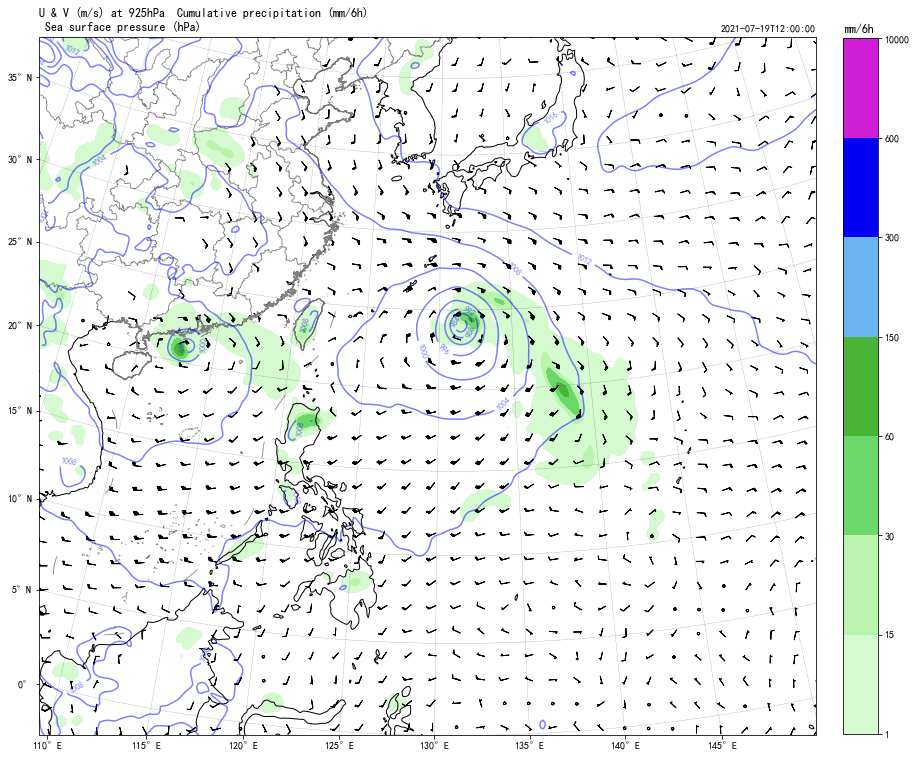

In [12]:
# 降水 风场
ax,fig=createmap()
# 标题 
ax.set_title('U & V (m/s) at 925hPa  Cumulative precipitation (mm/6h)  \n Sea surface pressure (hPa)',loc='left')
ax.set_title(str(v['time'].data[0])[0:19],fontdict={'fontsize':10},loc='right')

## 累计降水
levels=[1,15,30,60,150,300,600,10000]
colors=['#d5facf','#b9f3ad','#6cd869','#48b537','#6ab5f1','#0400f6','#cf1ed5']
colorbar=ax.contourf(lon,lat,rainsums[0,:,:],levels=levels,colors=colors,transform=ccrs.PlateCarree())
cb=fig.colorbar(colorbar,extendrect='True',pad=0.03,fraction=0.1,shrink=0.8)
cb.ax.set_title('mm/6h')

## 海平面气压
line=ax.contour(lon,lat,ps[0,:,:],colors='blue',levels=np.arange(960,1100,4),transform=ccrs.PlateCarree(),alpha=0.5)
plt.clabel(line,inline=True, fontsize=8, fmt='%.0f')

## UV风场
ax.barbs(np.array(lon)[::10,::10], np.array(lat)[::10,::10], np.array(us[0,:,:])[::10,::10], np.array(vs[0,:,:])[::10,::10], pivot='middle', length=4, barb_increments=dict(half=2, full=4, flag=20),color='black', transform=ccrs.PlateCarree())


#保存图片
plt.savefig('outrain.png',dpi=500)


In [13]:
n=10
# # print(n1)
# for n in n1:
lats=24-0.1*n
lons=131+0.3*n
lone=131-0.3*n
late=24+0.1*n
start =(lats,lons)# 起始经纬坐标
end =(late,lone)# 终止经纬坐标 粗略
print((lons,lats),(lone,late))
# lats=23.9
# lons=129
# lone=133
# late=23.9

(134.0, 23.0) (128.0, 25.0)


In [14]:
T1= wrf.getvar(ds,'T') ##wrf-python
T2=T1                   
T2[:,:,:]=Taa[0,:,:,:]  # Taa salem 要把里面的数据（除了数据描述信息）赋值给wrf-python读出来的（数据描述信息是wrf-python，方便后续使用wrf-python的函数）

In [15]:
start_point=wrf.CoordPair(lat=lats,lon=lons)
end_point=wrf.CoordPair(lat=late,lon=lone)
P=wrf.getvar(ds,'P')+wrf.getvar(ds,'PB')
Ta=wrf.vertcross(T2,P,wrfin=ds,start_point=start_point,end_point=end_point,latlon=True,meta=True)

In [16]:
latp=[]
lonp=[]
for i in range(len(Ta.xy_loc)):
    temp=str(Ta.xy_loc[i].data).replace('=',' ').replace(',', '0').replace(')','0').split()
    latp.append(round(float(temp[5]),2))
    lonp.append(round(float(temp[7]),2))

<function lambert_yticks.<locals>.<lambda> at 0x00000253DA6B9240>


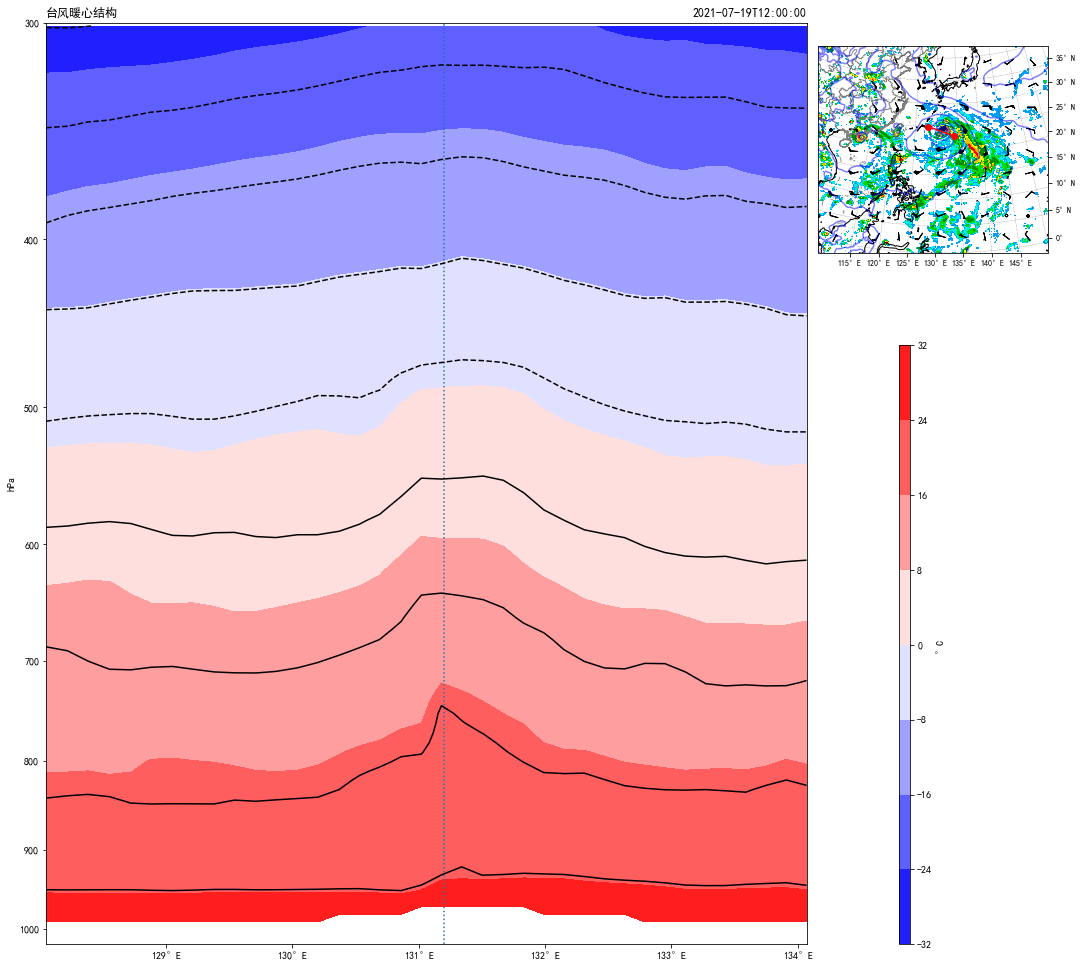

In [18]:
# 台风暖心结构 纬向剖面图 T
fig=plt.figure(figsize=(16,16))
ax=fig.add_axes([0.1,0.1,0.66,0.8]) # 主图
ax1=fig.add_axes([0.77,0.69,0.2,0.2],projection=ccrs.LambertConformal(central_longitude=131.1)) # 小地图
ax2=fig.add_axes([0.84, 0.1, 0.01, 0.52])  # 色标

# ---------------------------------小地图设置------------------------------------#
box1 = [109,150.2,0,40.65]
ax1.coastlines('50m')
ax1.add_geometries(Reader('D:\\maplist\\China_province\\bou2_4l.shp').geometries(), ccrs.PlateCarree(),
                   facecolor='none', edgecolor='gray', linewidth=0.8)
ax1.set_extent(box1, crs=ccrs.PlateCarree())
##############
fig.canvas.draw()  # 必要的
##############
## 坐标刻度的绘制
xticks =list(np.arange(115,240,5))
yticks = [-5,0,5,10,15,20,25,30,35,40,45,50]
ax1.gridlines(xlocs=xticks, ylocs=yticks, linestyle=':', linewidth=0.3, x_inline=False, y_inline=False, color='k')
ax1.xaxis.set_major_formatter(LONGITUDE_FORMATTER)
ax1.yaxis.set_major_formatter(LATITUDE_FORMATTER)
ax1.tick_params(labelsize=8)
lambert_xticks(ax1, xticks,'bottom')
lambert_yticks(ax1, yticks,'right')

## 小地图绘图部分
## 海平面气压
line=ax1.contour(lon,lat,ps[0,:,:],colors='blue',levels=np.arange(960,1100,4),transform=ccrs.PlateCarree(),alpha=0.5)
# plt.clabel(line,inline=False, fontsize=8, fmt='%.0f')

## 组合反射率（mdbz）
levels=[-100,10,15,20,25,30,35,40,45,50,55,60,65,70,100] #14
colors=['#ffffff','#01a0f6','#00ecec','#00d800','#019000','#ffff00','#e7c000','#ff9000','#ff0000','#d60000','#c00000','#ff00f0','#9600b4','#ad90f0']
ax1.contourf(lon,lat,radamax.data,levels=levels,colors=colors,transform=ccrs.PlateCarree())

## UV风场
ax1.barbs(np.array(lon)[::30,::30], np.array(lat)[::30,::30], np.array(us[0,:,:])[::30,::30], np.array(vs[0,:,:])[::30,::30], pivot='middle', length=4, barb_increments=dict(half=2, full=4, flag=20),color='black', transform=ccrs.PlateCarree())


## 绘制剖面
ax1.plot([lons,lone],[lats,late],color='red',marker='o',markerfacecolor='red',transform=ccrs.PlateCarree())
#--------------------------------------------------------------------------------------#

# 标题
ax.set_title('台风暖心结构',loc='left')
ax.set_title(str(v['time'].data[0])[0:19],fontdict={'fontsize':12},loc='right')

# 
colorbar=ax.contourf(lonp,Ta.vertical.data[:73]/100,Ta.data[:73,:]-273.15,cmap='bwr')
ax.axvline(x=131.2,linestyle=':')
cb=plt.colorbar(colorbar, extendrect='True', pad=0.03, fraction=0.04, shrink=1,cax=ax2)
cb.ax.set_ylabel('°C')
line=ax.contour(lonp,Ta.vertical.data[:73]/100,Ta.data[:73,:]-273.15,colors='black',levels=np.linspace(-90,30,20))
#####横坐标显示维度
lon_formatter = LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
####纵坐标格式显示
ax.invert_yaxis()
ax.set_yscale('symlog')
##暴力显示
ax.set_yticks([1000, 900, 800, 700, 600, 500, 400, 300], ["1000", "900", "800", "700", "600", "500", "400", "300"])
ax.set_ylabel('hPa')

# plt.tight_layout()###让图填充整个画布

# 保存图片
plt.savefig('outTpou.png',dpi=500)
